<a href="https://colab.research.google.com/github/Jovin-Joy4121/AI-ML-ELEVATE-TASK-DAY-8/blob/main/mall%20customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers (1).csv
Columns in dataset: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


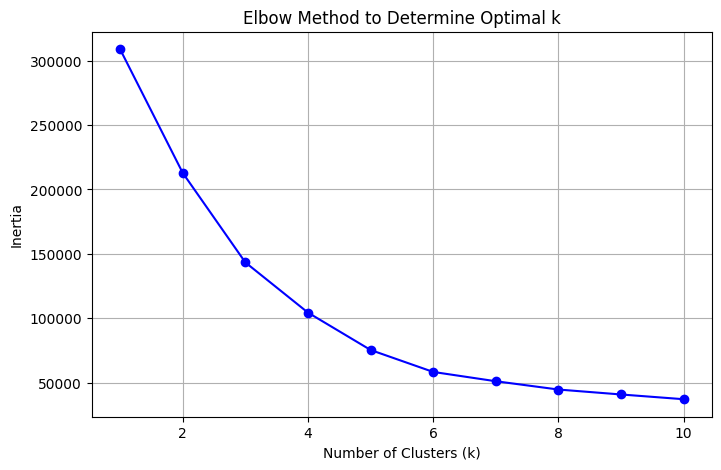

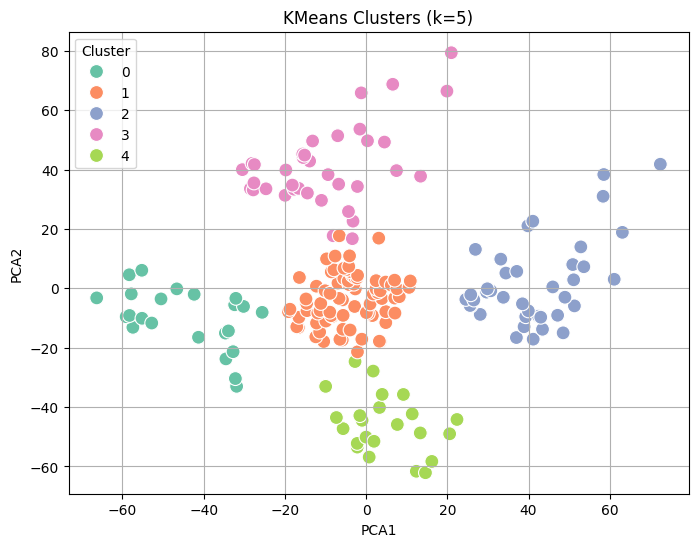

Silhouette Score for k=5: 0.4441


In [2]:
# Task 8: K-Means Clustering on Mall Customers Dataset

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import files

# Step 2: Upload Dataset
uploaded = files.upload()

# Step 3: Load Dataset
df = pd.read_csv("Mall_Customers.csv")
print("Columns in dataset:", df.columns)
df.head()

# Step 4: Data Preprocessing
# Rename column if needed (some versions use 'Gender')
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 5: Optional PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Step 6: Elbow Method to determine optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df.drop(['PCA1', 'PCA2'], axis=1))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

# Step 7: Apply KMeans with optimal k (example: k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df.drop(['PCA1', 'PCA2'], axis=1))

# Step 8: Visualize the clusters using PCA-reduced dimensions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title(f'KMeans Clusters (k={optimal_k})')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 9: Evaluate clustering using Silhouette Score
score = silhouette_score(df.drop(['PCA1', 'PCA2', 'Cluster'], axis=1), df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {score:.4f}")
